In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
plt.rc('figure', figsize=(12,9))

# Création ensemble triadique de Cantor

In [3]:
def recurence(intervalle):
    a, b = intervalle
    x = (2*a+b)/3
    y = (a+2*b)/3
    return [[a,x], [y,b]]


In [4]:
def cantor(n):
    initial = [[0,1]]
    for i in range(n):
        nouveau = list()
        for couple in initial:
            nouveau.extend(recurence(couple))
        initial = nouveau
    return initial
        

In [5]:
cantor(0)

[[0, 1]]

In [6]:
cantor(1)

[[0, 0.3333333333333333], [0.6666666666666666, 1]]

In [7]:
cantor(2)

[[0, 0.1111111111111111],
 [0.2222222222222222, 0.3333333333333333],
 [0.6666666666666666, 0.7777777777777777],
 [0.8888888888888888, 1]]

In [8]:
cantor(3)

[[0, 0.037037037037037035],
 [0.07407407407407407, 0.1111111111111111],
 [0.2222222222222222, 0.25925925925925924],
 [0.2962962962962963, 0.3333333333333333],
 [0.6666666666666666, 0.7037037037037036],
 [0.7407407407407406, 0.7777777777777777],
 [0.8888888888888888, 0.9259259259259259],
 [0.9629629629629629, 1]]

In [9]:
def affichage(n):
    for i in range(n):
        for intervalle in cantor(i):
            plt.plot(intervalle, [i,i])
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.5, n-0.5])

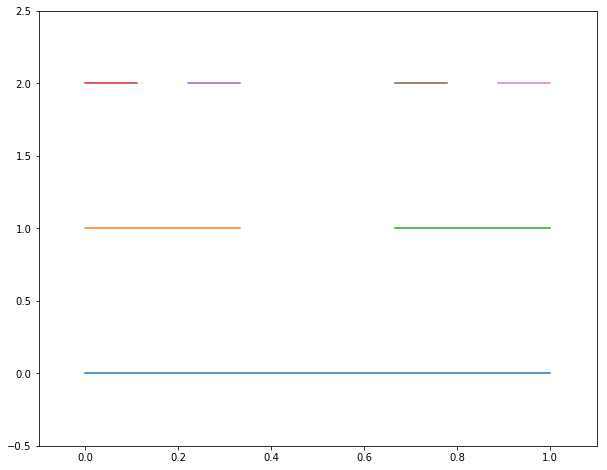

In [10]:
affichage(3)

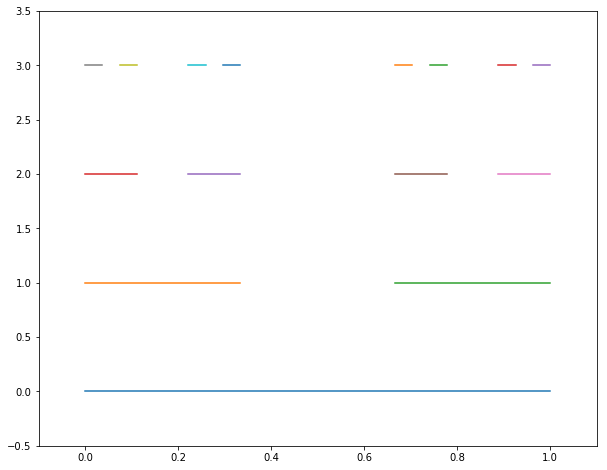

In [11]:
affichage(4)

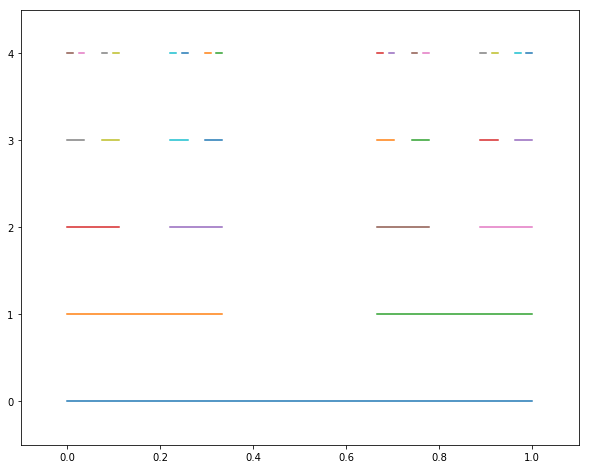

In [12]:
affichage(5)

# Escalier du diable

In [13]:
def rec(intervalle):
    a, b = intervalle
    return [[a, (a+b)/2], [(a+b)/2,b]]

def ordonnee(n):
    initiale = [[0,1]]
    for i in range(n):
        resultat = list()
        for intervalle in initiale:
            resultat.extend(rec(intervalle))
        initiale = resultat
    return initiale

In [14]:
ordonnee(0)

[[0, 1]]

In [15]:
ordonnee(1)

[[0, 0.5], [0.5, 1]]

In [16]:
ordonnee(2)

[[0, 0.25], [0.25, 0.5], [0.5, 0.75], [0.75, 1]]

In [17]:
def points(n):
    X = list()
    Y = list()
    for x, y in zip(cantor(n), ordonnee(n)):
        X.extend(x)
        Y.extend(y)
    return np.array(X), np.array(Y)

In [18]:
def escalier(n):
    X, Y = points(n)
    plt.plot(X, Y, color='blue')
        
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])

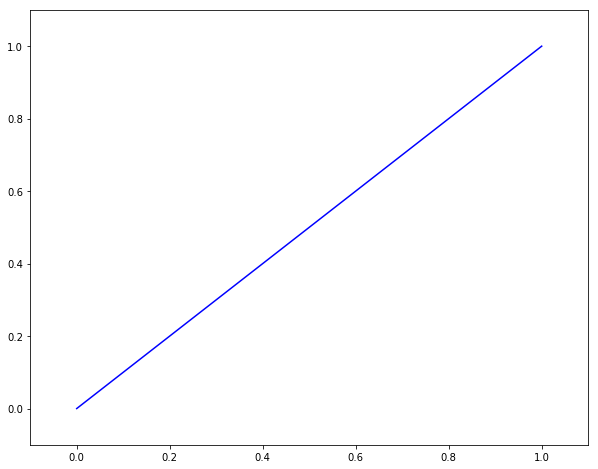

In [19]:
escalier(0)

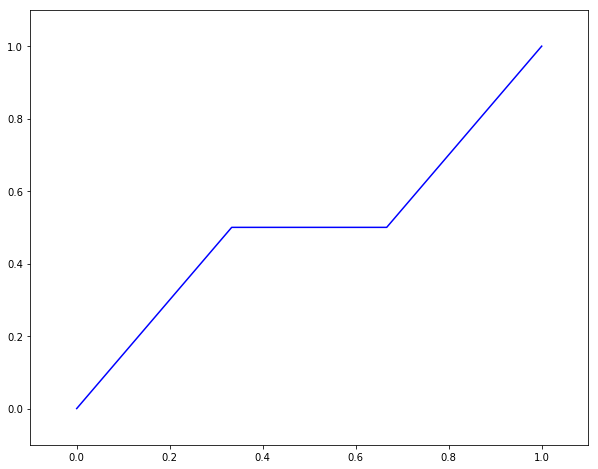

In [20]:
escalier(1)

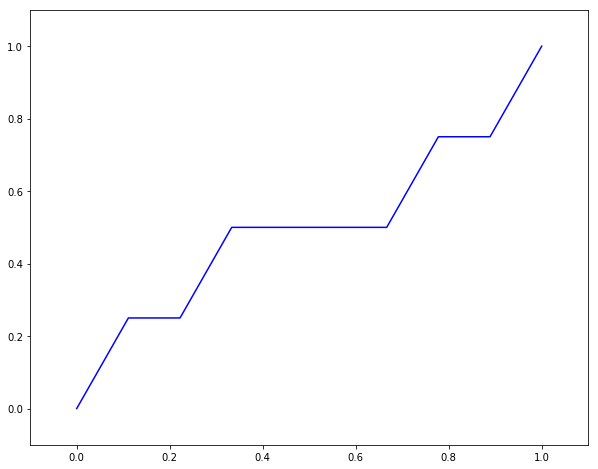

In [21]:
escalier(2)

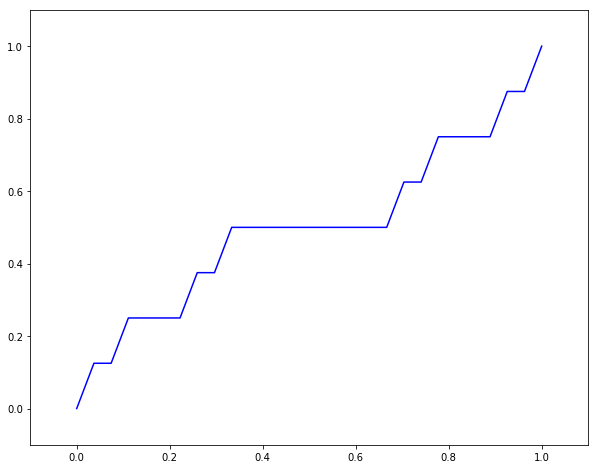

In [22]:
escalier(3)

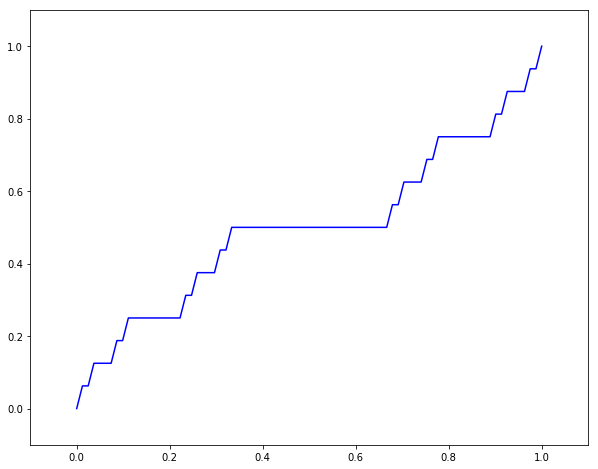

In [23]:
escalier(4)

# Différences

In [24]:
def diff(n):
    X, Y = points(n)
    verticale = ordonnee(n-1)
    y = list()
    for intervalle in verticale:
        a,b = intervalle
        y.extend([a,(2*a+b)/3, (a+2*b)/3, b])
    plt.plot( X, Y - np.array(y) )
    plt.ylim([-1, 1])

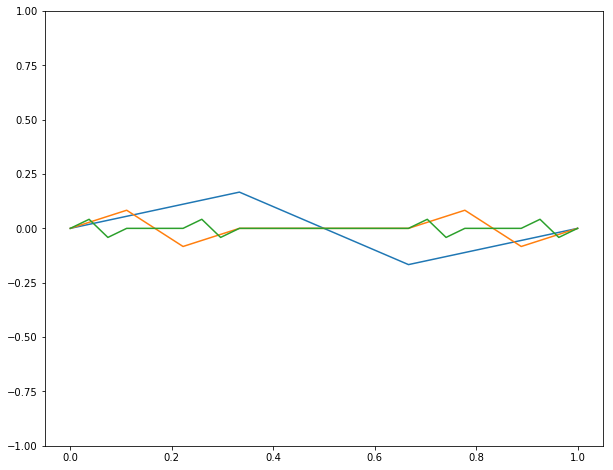

In [25]:
diff(1)
diff(2)
diff(3)

# Escalier alternatif

On voit maintenant l'escalier de Cantor comme un point fixe de l'application
$$T(\phi)(x):=
\begin{cases}
\frac{\phi(3x)}{2} & \text{ si } 0\leq x\leq \frac{1}{3}\\
\frac{1}{2} & \text{ si } \frac{1}{3}\leq x\leq \frac{2}{3}\\
\frac{\phi(3x-2)+1}{2} & \text{ si }  \frac{2}{3}\leq x\leq 1
\end{cases}
$$

In [37]:
def escalier(n):
    X = [0,1]
    Y = [0,1]
    fig, ax = plt.subplots()
    ax.plot(X, Y, lw=2, label='n=0')
    for i in range(n):
        X1 = [x/3 for x in X]
        X1.extend([(x+2)/3 for x in X])
        X = X1
        Y1 = [y/2 for y in Y]
        Y1.extend([(y+1)/2 for y in Y])
        Y = Y1
        ax.plot(X, Y, lw=2, label='n={}'.format(i+1))
        
    ax.legend(loc='best')
    ax.set_aspect("equal")

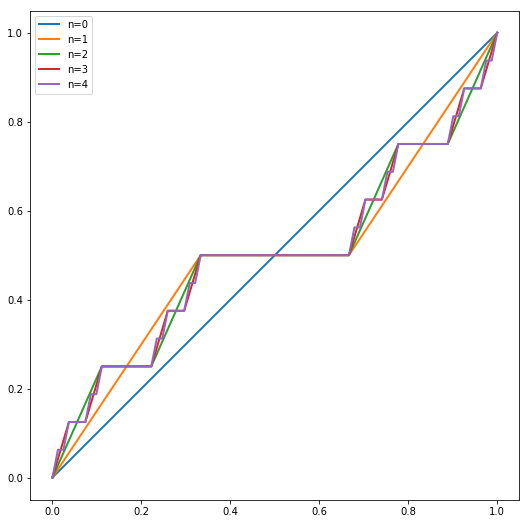

In [38]:
escalier(4)